<a href="https://colab.research.google.com/github/DajeanArcila/DajeanArcila/blob/main/ML_sarimas_ejemplo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [147]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

# Generar 250 días consecutivos a partir del 1 de enero de 2023
date_range = pd.date_range(start='2023-01-01', periods=1000, freq='D')

# Inicializar listas para almacenar los datos
open_prices = []
high_prices = []
low_prices = []
close_prices = []
volumes = []

# Generar datos aleatorios
np.random.seed(42)  # Para reproducibilidad

initial_price = 100  # Precio inicial ficticio
for _ in range(1000):
    open_price = initial_price + np.random.normal(0, 2)
    high_price = open_price + np.random.normal(0, 2)
    low_price = open_price - np.random.normal(0, 2)
    close_price = low_price + (high_price - low_price) * np.random.random()
    volume = int(np.random.normal(20000, 5000))

    open_prices.append(round(open_price, 2))
    high_prices.append(round(high_price, 2))
    low_prices.append(round(low_price, 2))
    close_prices.append(round(close_price, 2))
    volumes.append(max(0, volume))  # Asegurar que el volumen no sea negativo

    # Ajustar el precio inicial para el siguiente día
    initial_price = close_price

# Crear el DataFrame
data = {
    'Date': date_range,
    'Open': open_prices,
    'High': high_prices,
    'Low': low_prices,
    'Close': close_prices,
    'Volume': volumes
}

dataset = pd.DataFrame(data)

# Guardar el DataFrame en un archivo CSV
df.to_csv('/content/empresa_valores_250.csv', index=False)

# Mostrar las primeras filas del DataFrame
print(df.head(15))


              Open    High     Low   Close  Volume
Date                                              
2023-01-01  100.99  100.72   99.70   99.86   27615
2023-01-02  100.42  102.44  101.58  101.73   17374
2023-01-03  102.22   98.39  105.67  101.22   17188
2023-01-04  100.36   98.88  101.77   99.50    9301
2023-01-05   99.63   96.78  100.72   98.33   20554
2023-01-06   97.13   99.02   96.54   97.64   16822
2023-01-07   97.61   95.49   95.96   95.82   13895
2023-01-08  101.37  103.76  100.94  103.54   24408
2023-01-09  103.31  102.71  106.27  103.32   16400
2023-01-10  100.62   98.86  102.88   99.66   20672
2023-01-11   98.30   99.53   96.24   98.77   24656
2023-01-12   98.36   97.11  101.38  101.11   25498
2023-01-13   98.89   96.50   97.27   96.59   26781
2023-01-14   94.51   94.36   92.57   93.57   23977
2023-01-15   93.50   96.63   98.74   98.69   24109


In [143]:
#df = pd.read_csv('empresa_valores_250.csv', parse_dates=['Date'], index_col='Date')

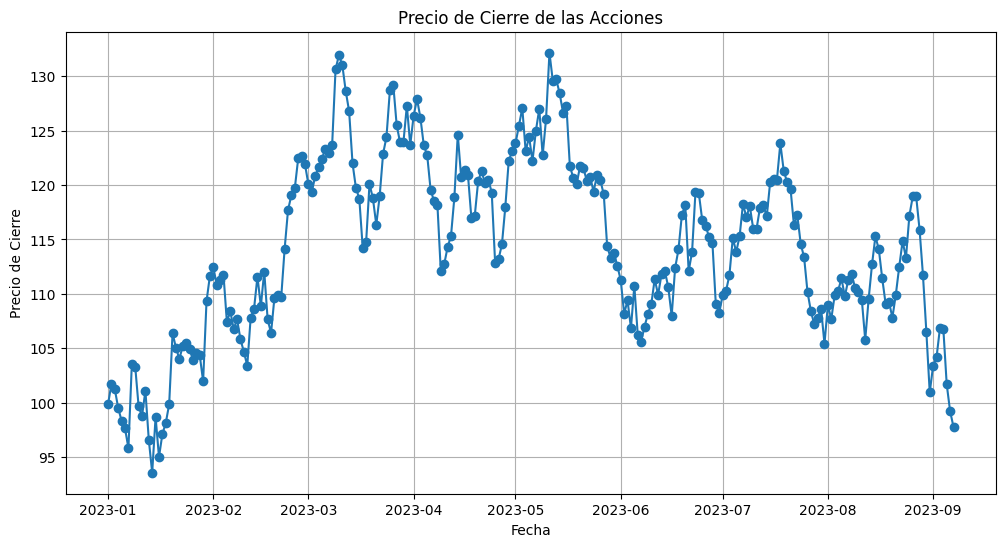

In [148]:
# Graficar los precios de cierre (por ejemplo)
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], marker='o', linestyle='-')
plt.title('Precio de Cierre de las Acciones')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre')
plt.grid(True)
plt.show()


In [149]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2023-01-01,100.99,100.72,99.70,99.86,27615
2023-01-02,100.42,102.44,101.58,101.73,17374
2023-01-03,102.22,98.39,105.67,101.22,17188
2023-01-04,100.36,98.88,101.77,99.50,9301
2023-01-05,99.63,96.78,100.72,98.33,20554


In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2023-01-01 to 2023-09-07
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    250 non-null    float64
 1   High    250 non-null    float64
 2   Low     250 non-null    float64
 3   Close   250 non-null    float64
 4   Volume  250 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 11.7 KB


In [151]:
dataset["Mean"] = (dataset["Low"] + dataset["High"])/2
dataset.head(2)

,Date,Open,High,Low,Close,Volume,Mean
0,2023-01-01,100.99,100.72,99.70,99.86,27615,100.21
1,2023-01-02,100.42,102.44,101.58,101.73,17374,102.01


In [152]:

dataset_for_prediction=dataset_for_prediction.dropna()

In [153]:
dataset_for_prediction["Date"] =pd.to_datetime(dataset_for_prediction["Date"])
dataset_for_prediction.index= dataset_for_prediction["Date"]

In [154]:

from sklearn.preprocessing import MinMaxScaler
sc_in = MinMaxScaler(feature_range=(0, 1))
scaled_input = sc_in.fit_transform(dataset_for_prediction[["Low", "High","Open", "Close", "Volume", "Mean"]])
scaled_input =pd.DataFrame(scaled_input)
X= scaled_input

In [155]:

sc_out = MinMaxScaler(feature_range=(0, 1))
scaler_output = sc_out.fit_transform(dataset_for_prediction[["Actual"]])
scaler_output =pd.DataFrame(scaler_output)
y=scaler_output

In [156]:

X.rename(columns={0:"Low", 1:"High", 2:"Open", 3:"Close", 4:"Volume", 5:"Mean"}, inplace=True)
X.index=dataset_for_prediction.index
X.head(2)


,Low,High,Open,Close,Volume,Mean
Date,,,,,,
2023-01-01,0.498439,0.510338,0.518955,0.499506,0.649045,0.509622
2023-01-02,0.516780,0.527685,0.513313,0.517988,0.349933,0.527664


In [164]:
# Verificar que data sea un DataFrame
if isinstance(data, pd.DataFrame):
    # Dividir los datos en entrenamiento (80%) y prueba (20%)
    train_size = int(len(data) * 0.8)
    train, test = data.iloc[:train_size], data.iloc[train_size:]

    # Mostrar el tamaño de los conjuntos
    print(f'Tamaño del conjunto de entrenamiento: {len(train)}')
    print(f'Tamaño del conjunto de prueba: {len(test)}')
else:
    print("Error: 'data' no es un DataFrame de pandas.")


Error: 'data' no es un DataFrame de pandas.


In [165]:
df=pd.DataFrame(data)


In [166]:
# Verificar que data sea un DataFrame
if isinstance(data, pd.DataFrame):
    # Dividir los datos en entrenamiento (80%) y prueba (20%)
    train_size = int(len(data) * 0.8)
    train, test = data.iloc[:train_size], data.iloc[train_size:]

    # Mostrar el tamaño de los conjuntos
    print(f'Tamaño del conjunto de entrenamiento: {len(train)}')
    print(f'Tamaño del conjunto de prueba: {len(test)}')
else:
    print("Error: 'data' no es un DataFrame de pandas.")

Error: 'data' no es un DataFrame de pandas.


In [161]:
# Dividir los datos en entrenamiento (80%) y prueba (20%)
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

# Mostrar el tamaño de los conjuntos
print(f'Tamaño del conjunto de entrenamiento: {len(train)}')
print(f'Tamaño del conjunto de prueba: {len(test)}')


Tamaño del conjunto de entrenamiento: 200
Tamaño del conjunto de prueba: 50


In [162]:
# Parámetros del modelo (ajusta según tu análisis)
p, d, q = 1, 1, 1
P, D, Q, m = 1, 1, 1, 12


In [167]:
# Ajustar el modelo SARIMAX
model = SARIMAX(train['Close'], exog=train[['High', 'Low', 'Open', 'Volume']], order=(p, d, q), seasonal_order=(P, D, Q, m))
model_fit = model.fit(disp=False)

# Resumen del modelo
print(model_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  200
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -295.557
Date:                            Mon, 08 Jul 2024   AIC                            609.113
Time:                                    20:40:58   BIC                            638.193
Sample:                                01-01-2023   HQIC                           620.896
                                     - 07-19-2023                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
High           0.4117      0.048      8.546      0.000       0.317       0.506
Low            0.5136      0.039   

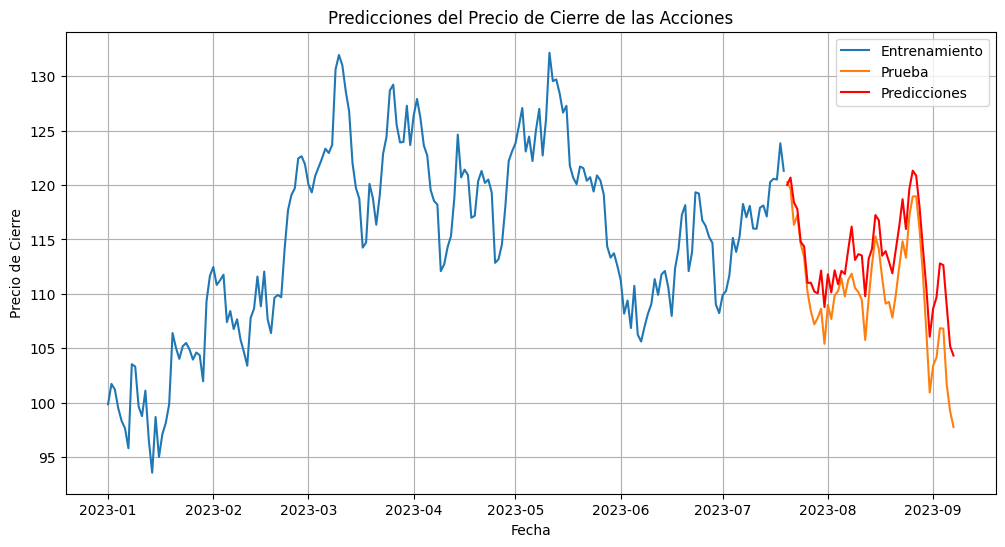

In [168]:
# Hacer predicciones
predictions = model_fit.predict(start=test.index[0], end=test.index[-1], exog=test[['High', 'Low', 'Open', 'Volume']], dynamic=False)

# Plotear los resultados
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Close'], label='Entrenamiento')
plt.plot(test.index, test['Close'], label='Prueba')
plt.plot(test.index, predictions, label='Predicciones', color='red')
plt.title('Predicciones del Precio de Cierre de las Acciones')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre')
plt.legend()
plt.grid(True)
plt.show()


In [169]:
# Predicciones futuras
n_steps = 10  # Número de pasos a predecir
future_exog = np.array([test[['High', 'Low', 'Open', 'Volume']].iloc[-1, :]] * n_steps)  # Utiliza el último valor de exog para predecir futuros
future_predictions = model_fit.forecast(steps=n_steps, exog=future_exog)

# Mostrar las predicciones futuras
print(future_predictions)


2023-07-20    101.677209
2023-07-21    101.849160
2023-07-22    101.315321
2023-07-23    101.171325
2023-07-24    101.085183
2023-07-25    101.395776
2023-07-26    101.737073
2023-07-27    101.951671
2023-07-28    102.426330
2023-07-29    102.322646
Freq: D, Name: predicted_mean, dtype: float64


In [170]:
# Calcular el MAPE para las predicciones
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Calcular el MAPE para las predicciones
mape = mean_absolute_percentage_error(test['Close'], predictions)
print(f'Error porcentual absoluto medio (MAPE): {mape:.2f}%')


Error porcentual absoluto medio (MAPE): 2.86%
